In [ ]:
%cd ../

In [2]:
from tvDatafeed import TvDatafeed, Interval
from dotenv import load_dotenv
import os
import pandas as pd
import pyutil
import backtrader as bt
import numpy as np
import talib as ta
import json
import pickle
import datetime
from tabulate import tabulate
from prettytable import PrettyTable
import tenxsqueeze as txs
import inspect
import seaborn as sns
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle("mtf_partial.pkl").dropna()
epsilon = 0.001
df["PLr"] = (np.log(df["max"] + epsilon) - np.log(-df["min"] + epsilon))
df["PLd"] = df["max"] + df["min"]

In [5]:
df[df.N > 3].sort_values("PLd")

,ticker,n_tf,N,thresh,T,min,max,final,start,end,dir,PLr,PLd
159632,AXON,4,7,0.249,30,-17.909601,0.357285,0.0,2023-08-08 15:00:00,2023-08-09 11:30:00,0.0,-3.911820,-17.552317
158952,AXON,3,7,0.249,30,-17.909601,0.357285,0.0,2023-08-08 15:00:00,2023-08-09 11:30:00,0.0,-3.911820,-17.552317
158296,AXON,2,7,0.249,30,-17.909601,0.357285,0.0,2023-08-08 15:00:00,2023-08-09 11:30:00,0.0,-3.911820,-17.552317
158324,AXON,2,7,0.499,30,-17.909601,0.357285,0.0,2023-08-08 15:00:00,2023-08-09 11:30:00,0.0,-3.911820,-17.552317
158951,AXON,3,7,0.249,15,-17.796178,0.357285,0.0,2023-08-08 15:00:00,2023-08-09 10:15:00,0.0,-3.905467,-17.438893
...,...,...,...,...,...,...,...,...,...,...,...,...,...
682792,IFF,2,4,0.499,15,-0.112094,21.976585,-0.0,2023-08-07 15:30:00,2023-08-08 10:30:00,0.0,5.269562,21.864491
682754,IFF,2,4,0.249,5,-0.112094,21.976585,-0.0,2023-08-07 15:30:00,2023-08-08 09:40:00,0.0,5.269562,21.864491
683794,IFF,4,4,0.249,5,-0.112094,21.976585,-0.0,2023-08-07 15:30:00,2023-08-08 09:40:00,0.0,5.269562,21.864491
683268,IFF,3,4,0.249,15,-0.112094,21.976585,-0.0,2023-08-07 15:30:00,2023-08-08 10:30:00,0.0,5.269562,21.864491


# PLr PLd Analysis

<Axes: xlabel='T-thresh', ylabel='N'>

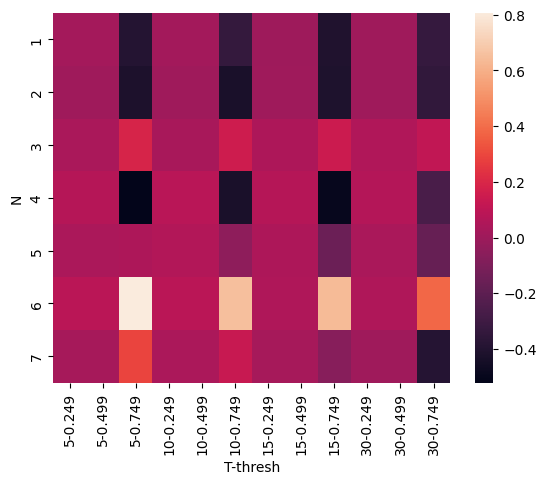

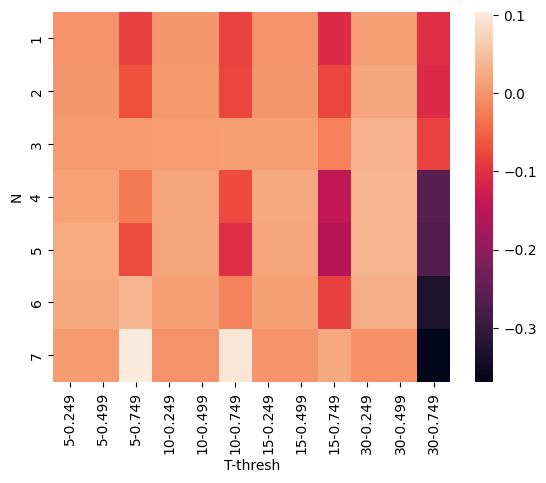

In [6]:
metrics_2 = df[df.n_tf == 2].pivot_table(index="N", columns=["T", "thresh"], values=["PLr", "PLd"])
sns.heatmap(metrics_2.PLr)
plt.figure()
sns.heatmap(metrics_2.PLd)

- Reason why 0.749 stands out is because it has 2/2 of the timeframes firing for N bars

379261


<Axes: xlabel='T-thresh', ylabel='N'>

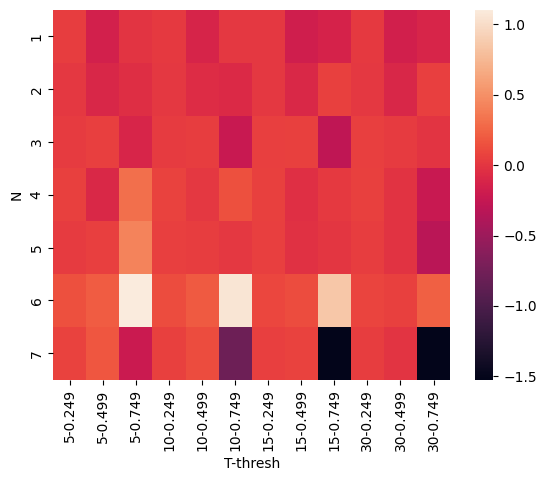

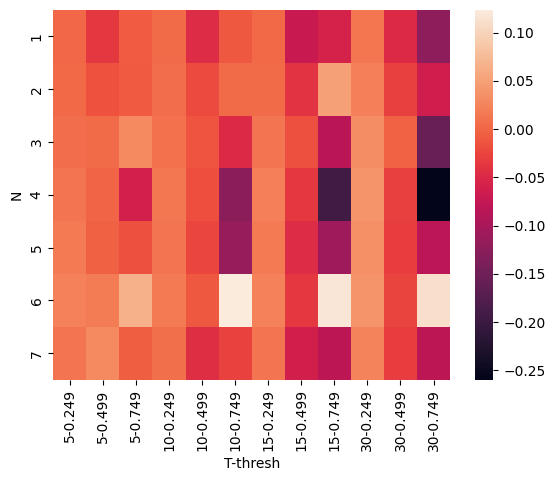

In [8]:
metrics_3 = df[df.n_tf == 3].pivot_table(index="N", columns=["T", "thresh"], values=["PLr", "PLd"])
print(len(df[df.n_tf == 3]))
sns.heatmap(metrics_3.PLr)
plt.figure()
sns.heatmap(metrics_3.PLd)

- N=6 is good for PLr and PLd
- No trend

417525


<Axes: xlabel='T-thresh', ylabel='N'>

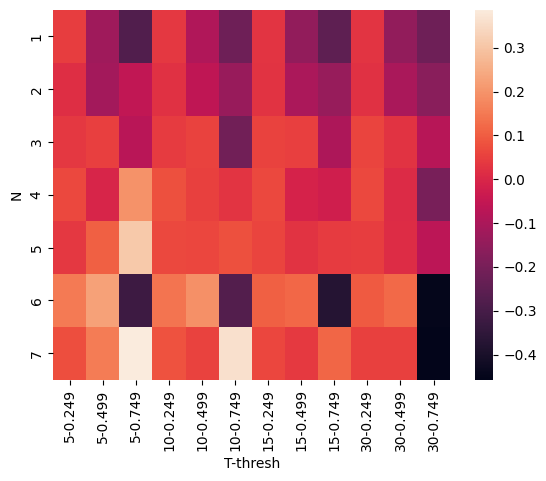

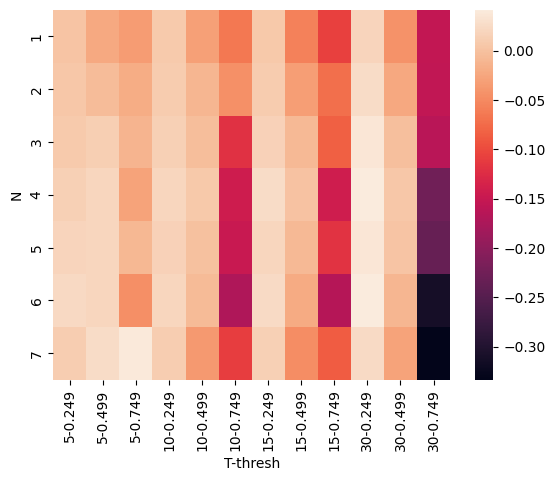

In [9]:
metrics_4 = df[df.n_tf == 4].pivot_table(index="N", columns=["T", "thresh"], values=["PLr", "PLd"])
print(len(df[df.n_tf == 4]))
sns.heatmap(metrics_4.PLr)
plt.figure()
sns.heatmap(metrics_4.PLd)

- PLr is only good for short time horizons betewen N=4 and N=6
- PLd is pretty bad